In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
import requests
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [18]:
# Create a set of random latitude and longitude combinations.
lats= np.random.uniform(-90,90 , size=1500)
lngs= np.random.uniform(-180, 180 , size =1500 )
lat_lngs= zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
coordinates= list(lat_lngs)
#for coordinate in coordinates:
#    print(coordinate[0], coordinate[1])

In [20]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city= citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities: 
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [23]:
# Create an empty list to hold the weather data.
city_data= []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count= 1
set_count=1

# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50== 0 and i>= 50):
        record_count= 1
        set_count+=1 
        
    # Create endpoint URL with each city.
    city_url = url+ "&q="+ cities[i]

Beginning Data Retrieval     
-----------------------------


In [24]:
# Create an empty list to hold the weather data.
city_data= []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count= 1
set_count=1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather= requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vestmanna
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | tuatapere
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | laguna
Processing Record 13 of Set 1 | matveyevka
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | nome
Processing Record 17 of Set 1 | flin flon
Processing Record 18 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | v

Processing Record 35 of Set 4 | kazachinskoye
Processing Record 36 of Set 4 | boali
Processing Record 37 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 4 | grand gaube
Processing Record 39 of Set 4 | vestmannaeyjar
Processing Record 40 of Set 4 | beloha
Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | cidreira
Processing Record 43 of Set 4 | erenhot
Processing Record 44 of Set 4 | flinders
Processing Record 45 of Set 4 | lakes entrance
Processing Record 46 of Set 4 | krasnoselkup
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | kailua
Processing Record 49 of Set 4 | york
Processing Record 50 of Set 4 | manono
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | dingle
Processing Record 3 of Set 5 | digha
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | palana
Processing Record 6 of Set 5 | sept-iles
Processing Record 7 of Set 5 | bengkulu
Processing Re

Processing Record 25 of Set 8 | beihai
Processing Record 26 of Set 8 | ipueiras
Processing Record 27 of Set 8 | morant bay
Processing Record 28 of Set 8 | kuusamo
Processing Record 29 of Set 8 | ballina
Processing Record 30 of Set 8 | casino
Processing Record 31 of Set 8 | gangotri
City not found. Skipping...
Processing Record 32 of Set 8 | mehamn
Processing Record 33 of Set 8 | phan rang
City not found. Skipping...
Processing Record 34 of Set 8 | kyra
Processing Record 35 of Set 8 | okato
Processing Record 36 of Set 8 | beyneu
Processing Record 37 of Set 8 | isny
Processing Record 38 of Set 8 | muscat
Processing Record 39 of Set 8 | benghazi
Processing Record 40 of Set 8 | faya
Processing Record 41 of Set 8 | lewisporte
Processing Record 42 of Set 8 | paramonga
Processing Record 43 of Set 8 | temaraia
City not found. Skipping...
Processing Record 44 of Set 8 | peniche
Processing Record 45 of Set 8 | bourail
Processing Record 46 of Set 8 | golden
Processing Record 47 of Set 8 | oyama
P

Processing Record 19 of Set 12 | iquique
Processing Record 20 of Set 12 | kisanga
Processing Record 21 of Set 12 | alnashi
Processing Record 22 of Set 12 | darab
Processing Record 23 of Set 12 | rudsar
Processing Record 24 of Set 12 | corner brook
Processing Record 25 of Set 12 | gwadar
Processing Record 26 of Set 12 | graaff-reinet
Processing Record 27 of Set 12 | tarragona
Processing Record 28 of Set 12 | altay
Processing Record 29 of Set 12 | canitas
City not found. Skipping...
Processing Record 30 of Set 12 | kamenka
Processing Record 31 of Set 12 | kiama
Processing Record 32 of Set 12 | cairns
Processing Record 33 of Set 12 | shache
Processing Record 34 of Set 12 | cap malheureux
Processing Record 35 of Set 12 | bolshaya sosnova
Processing Record 36 of Set 12 | seydi
Processing Record 37 of Set 12 | bara
Processing Record 38 of Set 12 | shimoda
Processing Record 39 of Set 12 | danielskuil
Processing Record 40 of Set 12 | stefan cel mare
Processing Record 41 of Set 12 | grand centr

In [25]:
len(city_data)

556

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vestmanna,62.1564,-7.1664,47.32,93,75,16.11,FO,2021-07-30 04:18:39
1,Saldanha,-33.0117,17.9442,52.11,83,27,4.52,ZA,2021-07-30 04:13:56
2,Thompson,55.7435,-97.8558,60.53,84,98,5.84,CA,2021-07-30 04:18:39
3,Tuatapere,-46.1333,167.6833,52.83,83,100,3.40,NZ,2021-07-30 04:18:39
4,Bredasdorp,-34.5322,20.0403,47.52,87,30,5.75,ZA,2021-07-30 04:18:40
5,Vaini,-21.2000,-175.2000,75.36,88,75,5.75,TO,2021-07-30 04:18:40
6,Carnarvon,-24.8667,113.6333,71.67,58,40,19.57,AU,2021-07-30 04:15:49
7,Port Alfred,-33.5906,26.8910,54.93,80,15,7.47,ZA,2021-07-30 04:18:41
8,Barrow,71.2906,-156.7887,50.02,87,90,8.05,US,2021-07-30 04:18:41
9,Laguna,38.4210,-121.4238,95.31,39,1,1.99,US,2021-07-30 04:18:00


In [27]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vestmanna,FO,2021-07-30 04:18:39,62.1564,-7.1664,47.32,93,75,16.11
1,Saldanha,ZA,2021-07-30 04:13:56,-33.0117,17.9442,52.11,83,27,4.52
2,Thompson,CA,2021-07-30 04:18:39,55.7435,-97.8558,60.53,84,98,5.84
3,Tuatapere,NZ,2021-07-30 04:18:39,-46.1333,167.6833,52.83,83,100,3.40
4,Bredasdorp,ZA,2021-07-30 04:18:40,-34.5322,20.0403,47.52,87,30,5.75


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [30]:
# Import the time module
import time
# Get today's date in seconds.
today= time.time()
today

1627618888.9162714

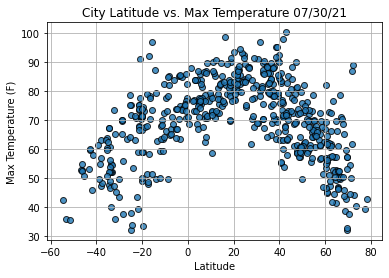

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

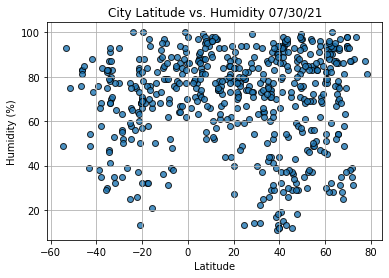

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

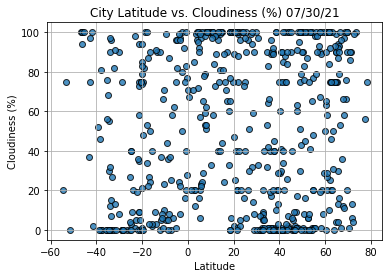

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

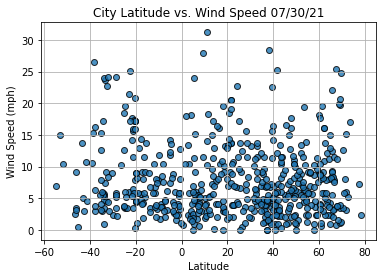

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [42]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
line_eq= print(f"y = {round(slope,2)}x + {round(intercept,2)}")
print(f"The p-value is: {p_value:.3f}")

regress_values= [(lat*slope + intercept) for lat in lats]


y = 0.01x + 69.42
The p-value is: 0.670


[69.8913686884425,
 69.16290065854712,
 69.8422808887605,
 69.06246084624577,
 69.1512619304496,
 69.25331378887876,
 69.22524688699444,
 69.15846944533064,
 69.96128678787571,
 69.70968511929718,
 69.8147742992055,
 69.09509674306689,
 69.58456553906952,
 69.9093162884229,
 69.83481541588085,
 69.12469991113284,
 69.80351370538489,
 69.24208687503423,
 69.08810891348438,
 69.7804559344884,
 69.74167420748677,
 69.85794590490751,
 70.00869441602373,
 69.69157677397638,
 69.44713669303877,
 69.34057554508496,
 69.43717354375123,
 69.71590979123988,
 69.25937541911908,
 69.9782515449178,
 69.91529371872302,
 69.2258255702198,
 69.23979510575282,
 69.91232758446601,
 69.49327060572779,
 69.81470923561534,
 69.15801476565356,
 69.05888847241933,
 69.85274923768924,
 69.72797640812439,
 69.16287310220305,
 68.99612124427101,
 69.00875123530085,
 69.87604506478029,
 69.73782320840367,
 69.23861477568202,
 69.64892567699559,
 69.70235666268385,
 69.86186426394278,
 69.33556641409712,
 69.4356

In [70]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [74]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df= city_data_df.loc[city_data_df["Lat"]>=0]
southern_hemi_df= city_data_df.loc[city_data_df["Lat"]<0]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vestmanna,FO,2021-07-30 04:18:39,62.1564,-7.1664,47.32,93,75,16.11
2,Thompson,CA,2021-07-30 04:18:39,55.7435,-97.8558,60.53,84,98,5.84
8,Barrow,US,2021-07-30 04:18:41,71.2906,-156.7887,50.02,87,90,8.05
9,Laguna,US,2021-07-30 04:18:00,38.4210,-121.4238,95.31,39,1,1.99
10,Matveyevka,RU,2021-07-30 04:18:41,52.1500,56.1833,76.15,30,100,12.17


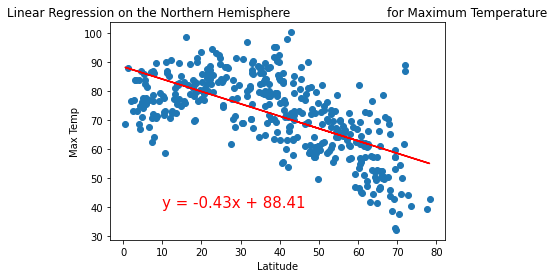

In [79]:
# Linear regression on the Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", 'Max Temp',(10,40))

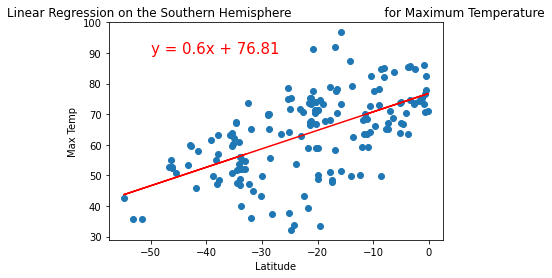

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

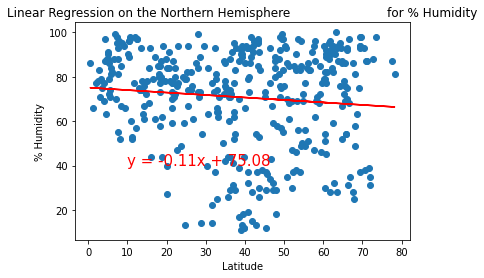

In [82]:
# Linear regression on the Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for % Humidity", '% Humidity',(10,40))

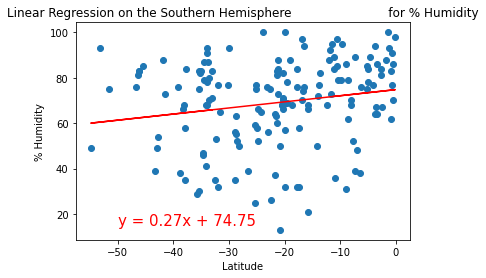

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

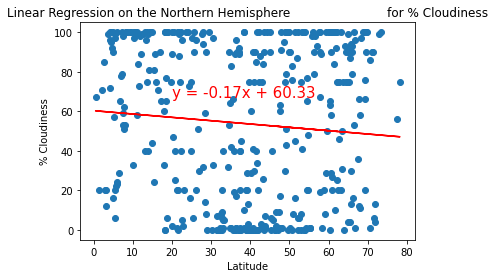

In [91]:
# Linear regression on the Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for % Cloudiness", '% Cloudiness',(20,67))

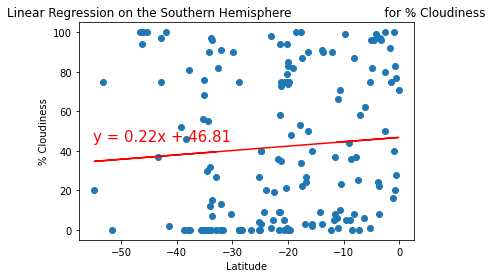

In [104]:
# Linear regression on the Northern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                       for % Cloudiness", '% Cloudiness',(-55,45))

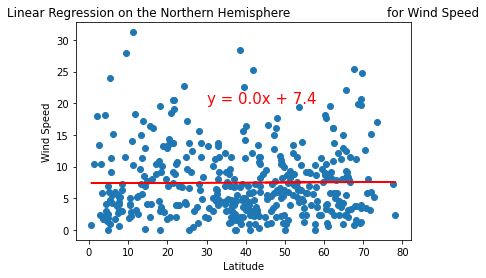

In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,20))

In [9]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]



In [10]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
line_eq= print(f"y = {round(slope,2)}x + {round(intercept,2)}")
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [14]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values= [(lat*slope + intercept) for lat in lats]

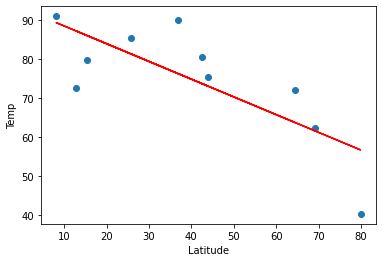

In [15]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()